In [62]:
import torch


def schwarzchild_metric(x,M=1):
    """ Computes the schwarzchild metric in cartesian like coordinates"""
    bs,d = x.shape
    r = (x[:,1:]**2).sum(-1).sqrt()
    rhat = x[:,1:]/r[:,None]
    rs = 2*M
    a = (1-rs/r)[:,None]
    g00 = -a
    g0i = torch.zeros_like(x[:,1:])
    # I +(1/a -1)rrT
    gij = torch.eye(3,dtype=x.dtype)+rhat[:,:,None]*rhat[:,None,:]*(1/a[...,None]-1)
    g0μ = torch.cat([g00,g0i],dim=1)
    giμ = torch.cat([g0i[:,None,:],gij],dim=1)
    g = torch.cat([g0μ[:,:,None],giμ],dim=2)
    sqrt_det_g = torch.ones_like(x[:,0]) #\sqrt{1-a}
    ginv00 = -torch.ones_like(x[:,:1])/a
    # I + (a-1)rrT
    ginvij = torch.eye(3,dtype=x.dtype) +rhat[:,:,None]*rhat[:,None,:]*(a[...,None]-1)
    ginv0μ = torch.cat([ginv00,g0i],dim=1)
    ginviμ = torch.cat([g0i[:,None,:],ginvij],dim=1)
    ginv = torch.cat([ginv0μ[:,:,None],ginviμ],dim=2)
    return g,ginv,sqrt_det_g

In [63]:
x = torch.rand(10,4)+.2

In [64]:
g,ginv,sqrt_det_g = schwarzchild_metric(x)

In [65]:
g

tensor([[[ 0.5902,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0226, -0.5957, -1.1503],
         [ 0.0000, -0.5957,  0.6370, -0.7010],
         [ 0.0000, -1.1503, -0.7010, -0.3537]],

        [[ 0.7019,  0.0000,  0.0000,  0.0000],
         [ 0.0000, -1.0687, -0.7327, -0.4467],
         [ 0.0000, -0.7327,  0.7405, -0.1582],
         [ 0.0000, -0.4467, -0.1582,  0.9036]],

        [[ 0.6442,  0.0000,  0.0000,  0.0000],
         [ 0.0000, -1.0361, -0.9321, -0.4271],
         [ 0.0000, -0.9321,  0.5733, -0.1955],
         [ 0.0000, -0.4271, -0.1955,  0.9104]],

        [[ 0.9838,  0.0000,  0.0000,  0.0000],
         [ 0.0000, -0.2740, -0.8895, -0.3933],
         [ 0.0000, -0.8895,  0.3789, -0.2746],
         [ 0.0000, -0.3933, -0.2746,  0.8786]],

        [[ 0.3672,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0217, -1.3155, -0.9771],
         [ 0.0000, -1.3155, -0.7689, -1.3139],
         [ 0.0000, -0.9771, -1.3139,  0.0240]],

        [[ 0.3879,  0.0000,  0.0000,  0.0000],
   

In [66]:
torch.det(g)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000])

In [55]:
sqrt_det_g

tensor([[1.1689, 1.1689, 1.1689, 1.1689, 1.1689, 1.1689, 1.1689, 1.1689, 1.1689,
         1.1689],
        [1.1247, 1.1247, 1.1247, 1.1247, 1.1247, 1.1247, 1.1247, 1.1247, 1.1247,
         1.1247],
        [1.1839, 1.1839, 1.1839, 1.1839, 1.1839, 1.1839, 1.1839, 1.1839, 1.1839,
         1.1839],
        [1.0557, 1.0557, 1.0557, 1.0557, 1.0557, 1.0557, 1.0557, 1.0557, 1.0557,
         1.0557],
        [1.3544, 1.3544, 1.3544, 1.3544, 1.3544, 1.3544, 1.3544, 1.3544, 1.3544,
         1.3544],
        [1.1401, 1.1401, 1.1401, 1.1401, 1.1401, 1.1401, 1.1401, 1.1401, 1.1401,
         1.1401],
        [1.1413, 1.1413, 1.1413, 1.1413, 1.1413, 1.1413, 1.1413, 1.1413, 1.1413,
         1.1413],
        [1.1470, 1.1470, 1.1470, 1.1470, 1.1470, 1.1470, 1.1470, 1.1470, 1.1470,
         1.1470],
        [1.3711, 1.3711, 1.3711, 1.3711, 1.3711, 1.3711, 1.3711, 1.3711, 1.3711,
         1.3711],
        [1.1833, 1.1833, 1.1833, 1.1833, 1.1833, 1.1833, 1.1833, 1.1833, 1.1833,
         1.1833]])

In [71]:
torch.max(torch.tensor([3.]),torch.tensor([2.]))

tensor([3.])

In [1]:
import torch
from pdes import EinsteinPDE, gMLP
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = gMLP(L=3,k=512).cuda()
#model = Expression(lambda x: x[...,0]*(1-x[...,0])*x[...,1]*(1-x[...,1])*base_model(x))
opt = lambda params: torch.optim.AdamW(params,lr=1e-4,weight_decay=1e-4)#torch.optim.SGD(params,lr=1e-2,nesterov=True,momentum=.9)#torch.optim.Adam(params,lr=1e-4)
pde = EinsteinPDE(model,opt,bs=100)#,lr_sched=lambda e: 1/(1+e/20))

In [3]:
pde.solve(1000*10)

        loss
0  4881604.5


KeyboardInterrupt: 

Text(0.5, 0, 'r')

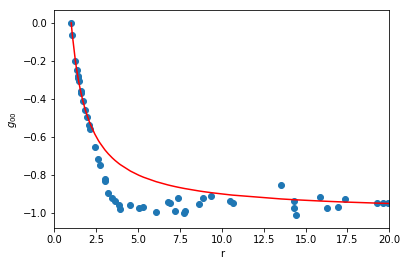

In [4]:
x = pde.sample_domain(50)
g = model(x)
gtt = g[:,0,0].cpu().data
r = (x[:,1:]**2).sum(-1).sqrt().cpu().data
plt.scatter(r,gtt)
r_perm = np.argsort(r.numpy())
plt.plot(r[r_perm],1/r[r_perm]-1,color='r')
plt.xlim(0,20)
plt.ylabel(r"$g_{00}$")
plt.xlabel("r")

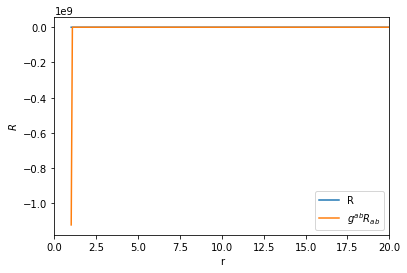

In [5]:
from pdes import ricci_curvature,scalar_curvature
ginv = torch.inverse(g)
Rab = ricci_curvature(model,x)
R = scalar_curvature(model,x)
R2 = (ginv*Rab).sum(-1).sum(-1)
plt.plot(r[r_perm],R[r_perm].cpu().data,label='R')
plt.plot(r[r_perm],R2[r_perm].cpu().data,label=r'$g^{ab}R_{ab}$')
plt.xlim(0,20)
plt.ylabel(r"$R$")
plt.xlabel("r")
plt.legend()

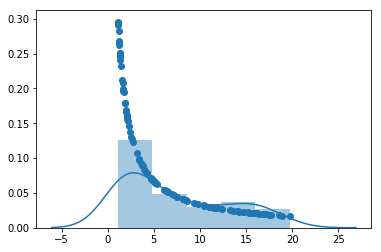

In [6]:
import seaborn as sns
x = pde.sample_domain(100)
r = (x[:,1:]**2).sum(-1).sqrt().cpu().data
sns.distplot(r)
plt.scatter(r,pde.importance_dist.density(x).cpu().data*r*r)
#plt.xlim(0,20)

Text(0.5, 0, 'r/rs')

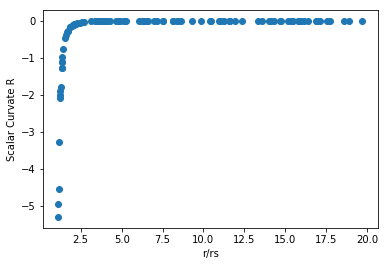

In [7]:
from functools import partial
from pdes import scalar_curvature,schwarzchild_metric
plt.scatter(r,scalar_curvature(partial(schwarzchild_metric,M=1/2),x).cpu().data)
#plt.xlim(0,20)
plt.ylabel(r"Scalar Curvature R")
plt.xlabel("r/rs")
#plt.axvline(2,color='r')

In [8]:
import scipy as sp
def cubic_interp(x0,xf,tt):
    t = torch.clamp(tt,min=0,max=1)
    return x0*(1-t)**3 + 3*(1-t)**2*t*x0+3*(1-t)*t**2*xf+xf*t**3
def bezier_interp(x0,xf,tt,n=5):
    t = torch.clamp(tt,min=0,max=1)
    ck = [sp.special.binom(n,k)*t**k*(1-t)**(n-k) for k in range(n+1)]
    return sum([ck[k]*x0 if k<n/2 else ck[k]*xf for k in range(n+1)])

NameError: name 'bezier_interp' is not defined

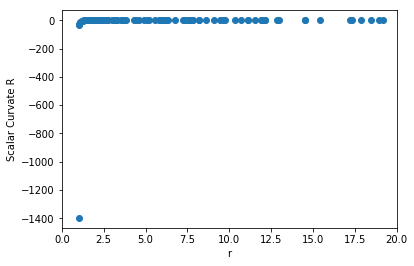

In [8]:
plt.scatter(r,scalar_curvature(model,x).cpu().data)
plt.xlim(0,20)
plt.ylabel(r"Scalar Curvate R")
plt.xlabel("r")
rs=1
rr = torch.linspace(0,20,100)
blend_near = bezier_interp(0,1,(rr/rs-1)/(2-1))
blend_far = 1-bezier_interp(0,1,(rr/rs-15)/(20-15))
blend = (blend_near*blend_far)
import matplotlib.pyplot as plt
plt.plot(rr/rs,blend)
plt.ylim(-1,1)
#plt.ylabel(r"$\alpha(r)$")
#plt.xlabel("r/rs")
plt.axvline(rs,color='r')
plt.show()

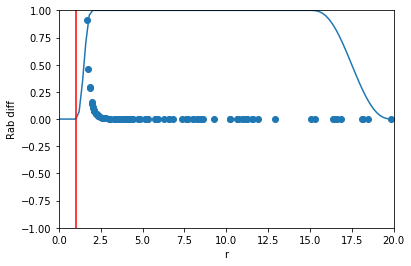

In [9]:
from pdes import ricci_curvature
x = pde.sample_domain(100)
r = (x[:,1:]**2).sum(-1).sqrt().cpu().data
Rab = ricci_curvature(model.cpu(),x.cpu()).cpu().data
plt.scatter(r,(Rab**2).mean(-1).mean(-1))
plt.xlim(0,20)
plt.ylabel(r"Rab diff")
plt.xlabel("r")
rs=1
rr = torch.linspace(0,20,100)
blend_near = bezier_interp(0,1,(rr/rs-1)/(2-1))
blend_far = 1-bezier_interp(0,1,(rr/rs-15)/(20-15))
blend = (blend_near*blend_far)
import matplotlib.pyplot as plt
plt.plot(rr/rs,blend)
plt.ylim(-1,1)
#plt.ylabel(r"$\alpha(r)$")
#plt.xlabel("r/rs")
plt.axvline(rs,color='r')
plt.show()

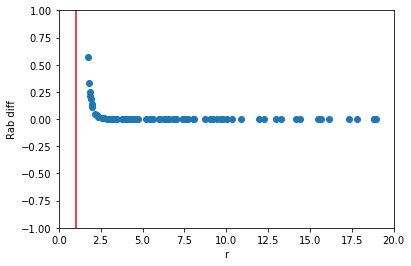

In [10]:
x = pde.sample_domain(100)
r = (x[:,1:]**2).sum(-1).sqrt().cpu().data
Rab = ricci_curvature(partial(schwarzchild_metric,M=1/2),x.cpu()).cpu().data
plt.scatter(r,(Rab**2).mean(-1).mean(-1))
plt.xlim(0,20)
plt.ylabel(r"Rab diff")
plt.xlabel("r")
rs=1
rr = torch.linspace(0,20,100)
import matplotlib.pyplot as plt
plt.ylim(-1,1)
#plt.ylabel(r"$\alpha(r)$")
#plt.xlabel("r/rs")
plt.axvline(rs,color='r')
plt.show()

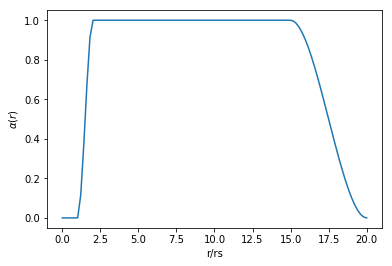

In [40]:
rs=1
r = torch.linspace(0,20,100)
#blend_near = torch.clamp((r-rs)/(2*rs-rs),min=0,max=1)
# Linear transition from g to gs from 15rs to 20rs
#blend_far = 1-torch.clamp((r-15*rs)/(20*rs-15*rs),min=0,max=1)
blend_near = cubic_interp(0,1,(r/rs-1.5)/(4.5-1.5))
blend_far = 1-cubic_interp(0,1,(r/rs-15)/(20-15))
blend = (blend_near*blend_far)
import matplotlib.pyplot as plt
plt.plot(r/rs,blend)

plt.ylabel(r"$\alpha(r)$")
plt.xlabel("r/rs")
plt.show()

In [6]:
blend_near

tensor([-1.0000, -0.7980, -0.5960, -0.3939, -0.1919,  0.0101,  0.2121,  0.4141,
         0.6162,  0.8182,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

In [7]:
blend_far

tensor([4.0000, 3.9596, 3.9192, 3.8788, 3.8384, 3.7980, 3.7576, 3.7172, 3.6768,
        3.6364, 3.5960, 3.5556, 3.5152, 3.4747, 3.4343, 3.3939, 3.3535, 3.3131,
        3.2727, 3.2323, 3.1919, 3.1515, 3.1111, 3.0707, 3.0303, 2.9899, 2.9495,
        2.9091, 2.8687, 2.8283, 2.7879, 2.7475, 2.7071, 2.6667, 2.6263, 2.5859,
        2.5455, 2.5051, 2.4646, 2.4242, 2.3838, 2.3434, 2.3030, 2.2626, 2.2222,
        2.1818, 2.1414, 2.1010, 2.0606, 2.0202, 1.9798, 1.9394, 1.8990, 1.8586,
        1.8182, 1.7778, 1.7374, 1.6970, 1.6566, 1.6162, 1.5758, 1.5354, 1.4949,
        1.4545, 1.4141, 1.3737, 1.3333, 1.2929, 1.2525, 1.2121, 1.1717, 1.1313,
        1.0909, 1.0505, 1.0101, 0.9697, 0.9293, 0.8889, 0.8485, 0.8081, 0.7677,
        0.7273, 0.6869, 0.6465, 0.6061, 0.5657, 0.5253, 0.4848, 0.4444, 0.4040,
        0.3636, 0.3232, 0.2828, 0.2424, 0.2020, 0.1616, 0.1212, 0.0808, 0.0404,
        0.0000])

In [8]:
torch.clamp((r-15*rs)/(20*rs-15*rs),max=1)

tensor([-3.0000, -2.9596, -2.9192, -2.8788, -2.8384, -2.7980, -2.7576, -2.7172,
        -2.6768, -2.6364, -2.5960, -2.5556, -2.5152, -2.4747, -2.4343, -2.3939,
        -2.3535, -2.3131, -2.2727, -2.2323, -2.1919, -2.1515, -2.1111, -2.0707,
        -2.0303, -1.9899, -1.9495, -1.9091, -1.8687, -1.8283, -1.7879, -1.7475,
        -1.7071, -1.6667, -1.6263, -1.5859, -1.5455, -1.5051, -1.4646, -1.4242,
        -1.3838, -1.3434, -1.3030, -1.2626, -1.2222, -1.1818, -1.1414, -1.1010,
        -1.0606, -1.0202, -0.9798, -0.9394, -0.8990, -0.8586, -0.8182, -0.7778,
        -0.7374, -0.6970, -0.6566, -0.6162, -0.5758, -0.5354, -0.4949, -0.4545,
        -0.4141, -0.3737, -0.3333, -0.2929, -0.2525, -0.2121, -0.1717, -0.1313,
        -0.0909, -0.0505, -0.0101,  0.0303,  0.0707,  0.1111,  0.1515,  0.1919,
         0.2323,  0.2727,  0.3131,  0.3535,  0.3939,  0.4343,  0.4747,  0.5152,
         0.5556,  0.5960,  0.6364,  0.6768,  0.7172,  0.7576,  0.7980,  0.8384,
         0.8788,  0.9192,  0.9596,  1.00

## Verify R and Rab are computed correctly

In [1]:
import torch
from pdes import spherical_schwarzchild_metric,scalar_curvature,ricci_curvature

In [2]:
from functools import partial
import matplotlib.pyplot as plt
x = 3*torch.randn(100,4).cpu()
x=x[x[:,1]>1.5]
r = x[:,1]
print(x.shape[0])
for i in range(16):
    plt.scatter(r,ricci_curvature(partial(spherical_schwarzchild_metric,M=1/2),x).cpu().data[:,i//4,i%4])
#plt.xlim(0,20)
plt.ylabel(r"Scalar Curvature R")
plt.xlabel("r/rs")
plt.ylim(-5,5)
plt.show()

35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Size([560, 4, 4])
torch.Size([35, 4, 4])
Γ bs 35
torch.Size([35840, 4, 4])
torch.Size([2240, 4, 4])
Γ bs 2240
torch.Si

<Figure size 640x480 with 1 Axes>

32
torch.Size([512, 4, 4])
torch.Size([32, 4, 4, 4])
torch.Size([32, 4, 4])
Γ bs 32
torch.Size([2048, 4, 4])
torch.Size([128, 4, 4])
Γ bs 128
torch.Size([32, 4, 4])


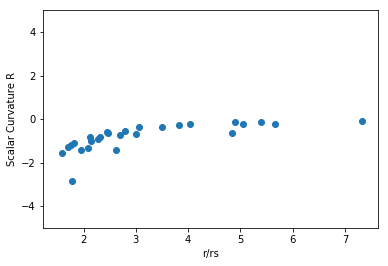

In [3]:
from functools import partial
import matplotlib.pyplot as plt
x = 3*torch.randn(100,4).cpu()
x=x[x[:,1]>1.5]
r = x[:,1]
print(x.shape[0])
plt.scatter(r,scalar_curvature(partial(spherical_schwarzchild_metric,M=1/2),x).cpu().data)
#plt.xlim(0,20)
plt.ylabel(r"Scalar Curvature R")
plt.xlabel("r/rs")
plt.ylim(-5,5)
plt.show()